In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np

In [48]:
def decibelise(x):
    return -10*np.log10(x/200)

def weibull(x,alpha):
    gamma = 0.5
    lmbda = 0.02
    beta = 3.5
    epsilon = 1.5
    # return gamma + (1 - gamma - lmbda) * (1 - np.exp(-(decibelise(x) / decibelise(alpha)) ** beta))
    return gamma + (1 - gamma - lmbda) * (1 -  np.exp(-10**(beta*(x - alpha + epsilon))))

In [49]:
x=32
all_alphas = np.arange(20,200)
print([decibelise(i) for i in all_alphas])

In [50]:
y = []
for alpha in all_alphas:
    y.append(weibull(x,alpha))
y = np.array(y)
y = y/np.sum(y)

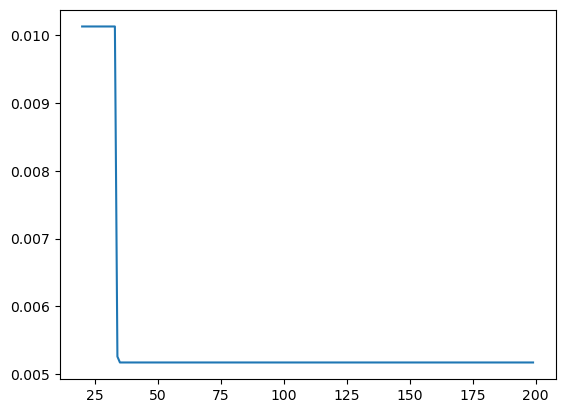

In [51]:
plt.plot(all_alphas,y)

In [4]:
decibelise(20)

np.float64(10.0)

In [5]:
targetAccuracy = 0.7
gamma = .5
lmbda = .02
targetFactor = (targetAccuracy - gamma) / (1 - gamma - lmbda)
targetFactor

0.4166666666666666

In [6]:
beta = -0.23
adjustment = (-np.log(1 - targetFactor))**(1 / beta)
adjustment

np.float64(14.689859008524015)

In [7]:
x = 32
x = (x-4)/196
x

0.14285714285714285

In [8]:
xnew

NameError: name 'xnew' is not defined

In [13]:
adjustment

np.float64(14.689859008524015)

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_56966/1886092750.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  LLcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x / (alpha)) ** beta))
/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_56966/1886092750.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  LLadjcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x / (alpha * adjustment)) ** beta))


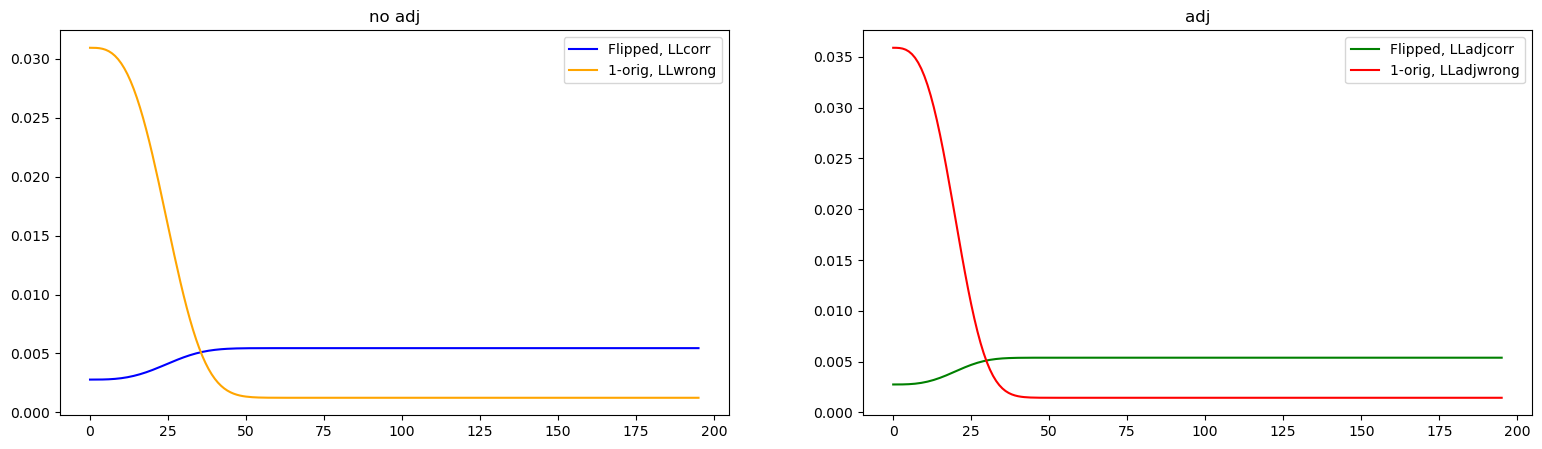

In [20]:
# Constants
gamma = 0.5
lmbda = 0.02
beta = -3#-0.23
# adjustment = 1  # Adjust as needed for scale
adjustment = (-np.log(1 - targetFactor))**(1 / beta)
adjustment

# Normalize x
x = (32 - 4) / 196  # Center x at 32, normalize between 0 and 1
xmid = 0.5          # Middle point (vertical line for mirroring)

# Initialize arrays
LLcorr = np.zeros((196,))
LLadjcorr = np.zeros((196,))
LLwrong = np.zeros((196,))
LLadjwrong = np.zeros((196,))

# Flip x around the center
xnew = 2 * xmid - x  # Flipped x values

# Loop to calculate LL values
for i, a in enumerate(np.arange(4, 200)):
    alpha = (a - 4) / 196  # Normalize alpha

    # Calculate likelihoods for original and flipped x
    LLcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x / (alpha)) ** beta))
    # LLwrong[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x / (alpha)) ** beta))
    LLwrong[i] = 1 - LLcorr[i] # LLwrong[i]
    # LLwrong[i] = 1 - LLcorr[i]
    
    # LLadjwrong[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x / (alpha * adjustment)) ** beta))
    LLadjcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x / (alpha * adjustment)) ** beta))
    LLadjwrong[i] = 1 - LLadjcorr[i]#LLadjwrong[i]
    # LLadjwrong[i] = 1 - LLadjcorr[i]

# LLcorr = LLwrong[::-1]
# LLadjcorr = LLadjwrong[::-1]
# Normalize if needed
LLcorr /= LLcorr.sum()
LLadjcorr /= LLadjcorr.sum()
LLwrong /= LLwrong.sum()
LLadjwrong /= LLadjwrong.sum()

# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(19, 5), sharey=False)

# Original
axs[0].plot(LLcorr, label="Flipped, LLcorr", color="blue")
axs[0].plot(LLwrong, label="1-orig, LLwrong", color="orange")
axs[0].set_title("no adj")
axs[0].legend()

# # Flipped
axs[1].plot(LLadjcorr, label="Flipped, LLadjcorr", color="green")
axs[1].plot(LLadjwrong, label="1-orig, LLadjwrong", color="red")
axs[1].set_title("adj")
axs[1].legend()

plt.show()


In [48]:
LLadjcorr

array([0.00331555, 0.00415867, 0.00427987, 0.00435677, 0.00441404,
       0.00445999, 0.00449852, 0.00453179, 0.0045611 , 0.00458733,
       0.00461109, 0.00463283, 0.00465287, 0.00467146, 0.00468881,
       0.00470508, 0.0047204 , 0.00473488, 0.00474861, 0.00476166,
       0.0047741 , 0.00478598, 0.00479737, 0.00480828, 0.00481877,
       0.00482887, 0.0048386 , 0.004848  , 0.00485708, 0.00486586,
       0.00487437, 0.00488262, 0.00489063, 0.00489841, 0.00490598,
       0.00491334, 0.0049205 , 0.00492749, 0.0049343 , 0.00494094,
       0.00494743, 0.00495377, 0.00495996, 0.00496602, 0.00497195,
       0.00497775, 0.00498343, 0.004989  , 0.00499445, 0.0049998 ,
       0.00500505, 0.0050102 , 0.00501526, 0.00502022, 0.0050251 ,
       0.00502989, 0.0050346 , 0.00503923, 0.00504379, 0.00504827,
       0.00505267, 0.00505701, 0.00506129, 0.00506549, 0.00506964,
       0.00507372, 0.00507774, 0.00508171, 0.00508562, 0.00508947,
       0.00509327, 0.00509702, 0.00510072, 0.00510437, 0.00510

In [49]:
LLcorr

array([0.5       , 0.67839855, 0.70167387, 0.71611222, 0.7266936 ,
       0.73507833, 0.74203507, 0.74798551, 0.75318696, 0.75780838,
       0.76196691, 0.76574715, 0.7692123 , 0.77241081, 0.77538069,
       0.77815232, 0.78075034, 0.78319506, 0.78550339, 0.7876896 ,
       0.78976579, 0.79174236, 0.79362829, 0.79543139, 0.79715851,
       0.79881567, 0.8004082 , 0.80194085, 0.80341787, 0.80484305,
       0.80621982, 0.80755128, 0.80884024, 0.81008925, 0.81130065,
       0.81247657, 0.81361896, 0.81472963, 0.81581023, 0.8168623 ,
       0.81788726, 0.81888641, 0.81986098, 0.82081211, 0.82174086,
       0.82264821, 0.8235351 , 0.82440239, 0.8252509 , 0.82608138,
       0.82689456, 0.82769112, 0.82847168, 0.82923686, 0.82998722,
       0.8307233 , 0.83144561, 0.83215463, 0.83285082, 0.83353462,
       0.83420643, 0.83486665, 0.83551565, 0.8361538 , 0.83678143,
       0.83739886, 0.8380064 , 0.83860435, 0.839193  , 0.83977261,
       0.84034343, 0.84090573, 0.84145974, 0.84200568, 0.84254

In [33]:
xnew/alpha

np.float64(-30.871794871794872)

In [34]:
(xnew/alpha)**beta

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_55952/3961539836.py:1: RuntimeWarning: invalid value encountered in scalar power
  (xnew/alpha)**beta


np.float64(nan)

In [19]:
x

0.14285714285714285

In [20]:
xnew

0.8571428571428572

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_55952/2259650060.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  LLcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x/(alpha*adjustment))**beta))
/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_55952/2259650060.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  LLadjcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x/alpha)**beta))


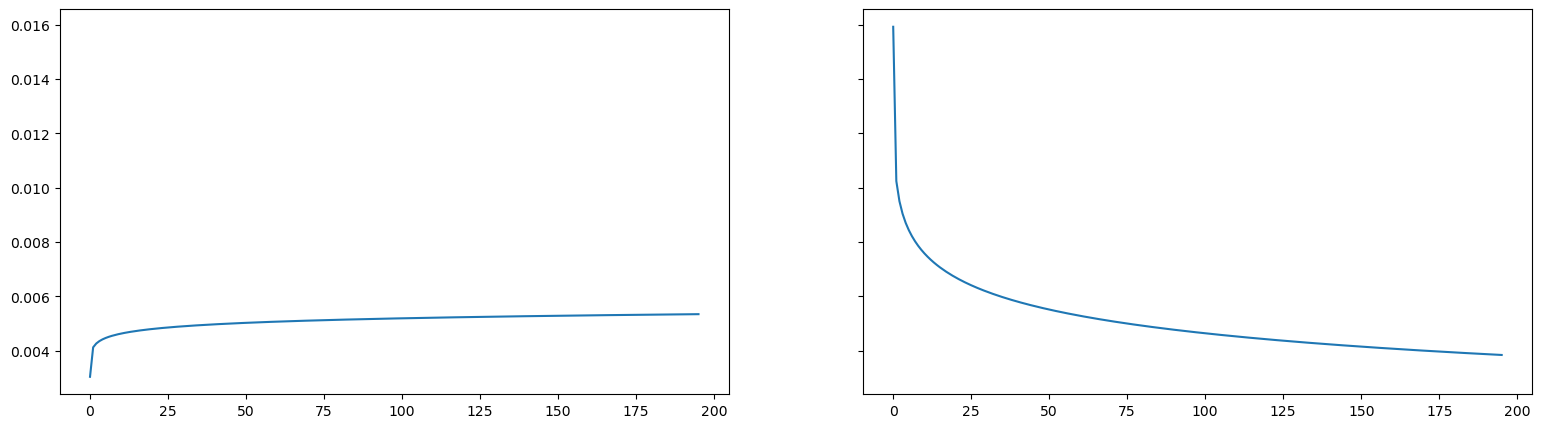

In [18]:
beta = -0.23
LLcorr = np.zeros((196,))
LLadjcorr = np.zeros((196,))
LLwrong = np.zeros((196,))
LLadjwrong = np.zeros((196,))
for i,a in enumerate(np.arange(4,200)):
    alpha = (a-4)/196
    LLcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x/(alpha*adjustment))**beta))
    LLwrong[i] = 1 -  LLcorr[i]
    LLadjcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x/alpha)**beta))
    LLadjwrong[i] = 1 -  LLadjcorr[i]
    # LL[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-10**(beta*(x-alpha))))
    # LLadj[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-10**(beta*(x-alpha/adjustment))))
LLcorr =  LLcorr/np.sum(LLcorr)
LLwrong =  LLwrong/np.sum(LLwrong)
LLadjcorr =  LLadjcorr/np.sum(LLadjcorr)
LLadjwrong =  LLadjwrong/np.sum(LLadjwrong)

fig,axs= plt.subplots(nrows=1,ncols=2, figsize=(19,5),sharey=True)
# axs[0].plot(LLcorr)
axs[0].plot(LLadjcorr)
# axs[1].plot(LLwrong)
axs[1].plot(LLadjwrong)

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_52441/3293030669.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  LLcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x/(alpha*adjustment))**beta))
/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_52441/3293030669.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  LLadjcorr[i] = gamma + (1 - gamma - lmbda) * (1 - np.exp(-(x/alpha)**beta))


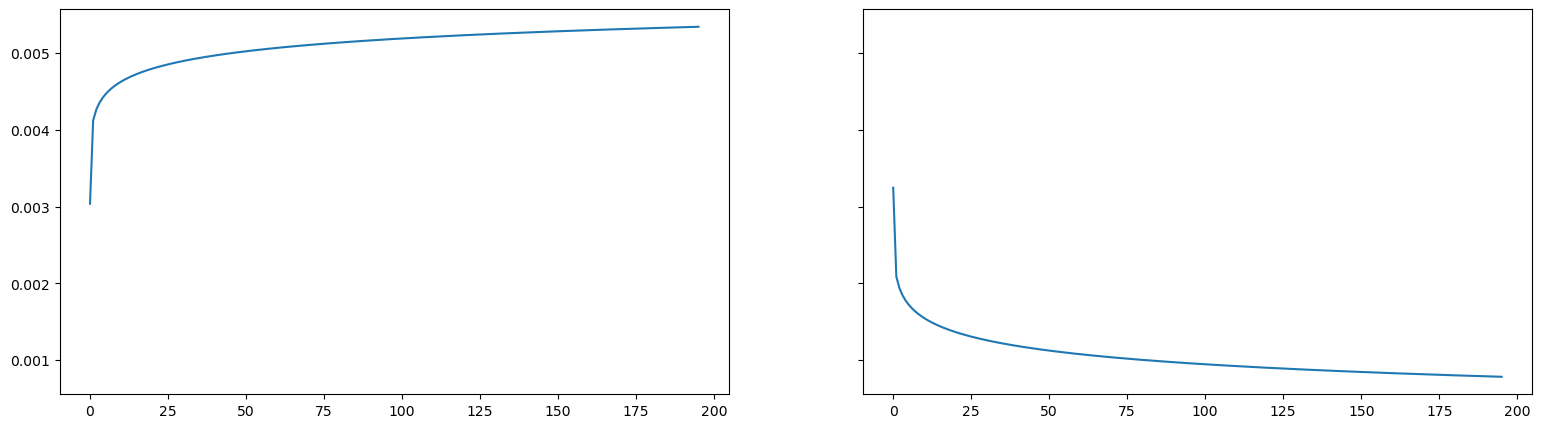

In [ ]:
beta = 0.23

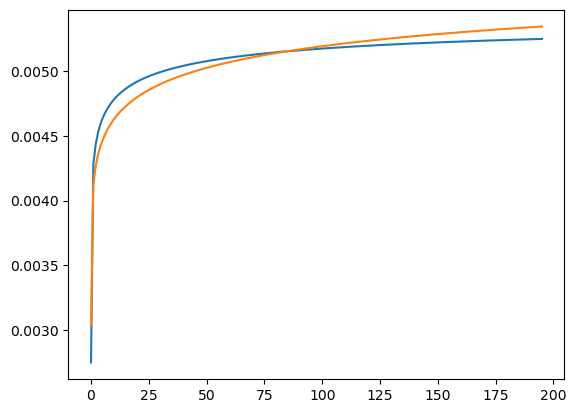

In [51]:
plt.plot(LLcorr)
plt.plot(LLadjcorr)

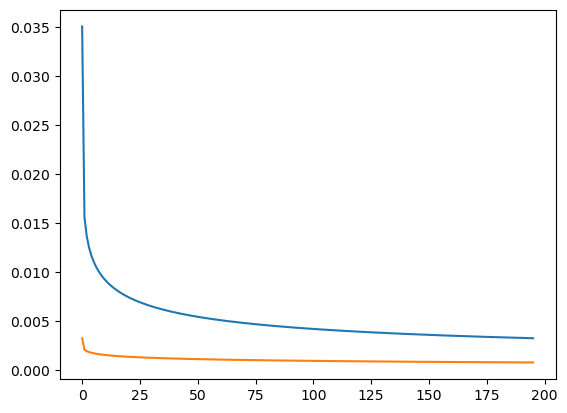

In [52]:
plt.plot(LLwrong)
plt.plot(LLadjwrong)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [3]:
# flat uniform prior
prior  = np.zeros((np.arange(4,200).shape[0],))
prior = 1/prior.shape[0]
prior

0.00510204081632653

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_32358/1131457813.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)


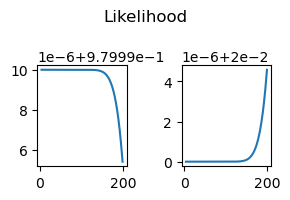

In [7]:
# test weibull to ID the 75% threshold
p_trial_right = []
p_trial_wrong = []
for alpha_unnorm in np.arange(4,200):
    alpha = (alpha_unnorm-4)/196 #49
    gamma = .5
    lmbda = .02
    # alpha = (49-4)/196 #49
    beta = 0.23 #-0.00178
    p_target = .75
    x = 50  # ndots on a trial
    preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
    p_trial_right.append(preal)
    p_trial_wrong.append(1-preal)

fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(3,2))
plt.suptitle('Likelihood')
axs[0].plot(np.arange(4,200), p_trial_right) # correct resp
axs[1].plot(np.arange(4,200), p_trial_wrong) # wrong resp
plt.tight_layout()

# studying how alpha and x matter for weibull functions

In [10]:
prior_range = [40,80]
p_trial_right = np.zeros(((prior_range[1]-prior_range[0]),(prior_range[1]-prior_range[0]+2)),dtype=float)
p_trial_wrong = np.zeros(((prior_range[1]-prior_range[0]),(prior_range[1]-prior_range[0]+2)),dtype=float)
for i,x_unnorm in enumerate(np.arange(prior_range[0],prior_range[1])):
    for j,alpha_unnorm in enumerate(np.arange(prior_range[0],prior_range[1]+2)):
        alpha = (alpha_unnorm-4)/(prior_range[1]-prior_range[0]) #49
        gamma = .5
        lmbda = .02
        beta = -0.23 #-0.00178
        x = (x_unnorm-4)/196 #49
        preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
        # p_trial_right.append(preal)
        # p_trial_wrong.append(1-preal)
        p_trial_right[i,j] = preal
        p_trial_wrong[i,j] = 1-preal

In [11]:
alpha_unnorm

np.int64(81)

In [12]:
x_unnorm

np.int64(79)

Text(0.5, 0, 'alpha')

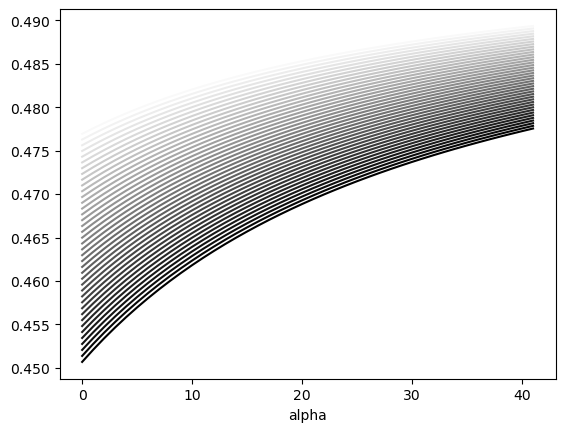

In [152]:
for i in range(p_trial_right.shape[0]):
    plt.plot(p_trial_right[i,:].T, alpha = (i+1)/p_trial_right.shape[0], color = 'k')
plt.xlabel('alpha')

Text(0.5, 0, 'x')

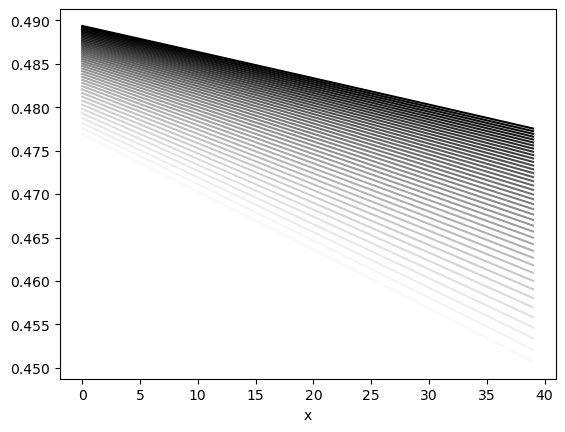

In [153]:
for i in range(p_trial_right.shape[1]):
    plt.plot(p_trial_right[:,i], alpha = (i+1)/p_trial_right.shape[1], color = 'k')
plt.xlabel('x')

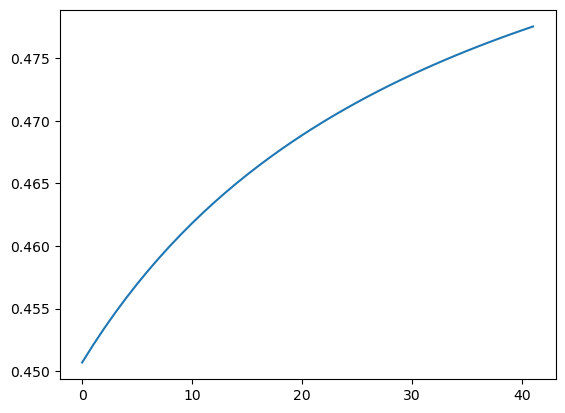

In [132]:
plt.plot(p_trial_right[39,:])

([<matplotlib.axis.YTick at 0x159c7da90>,
 [Text(0, 0, '40'),
  Text(0, 1, '41'),
  Text(0, 2, '42'),
  Text(0, 3, '43'),
  Text(0, 4, '44'),
  Text(0, 5, '45'),
  Text(0, 6, '46'),
  Text(0, 7, '47'),
  Text(0, 8, '48'),
  Text(0, 9, '49'),
  Text(0, 10, '50'),
  Text(0, 11, '51'),
  Text(0, 12, '52'),
  Text(0, 13, '53'),
  Text(0, 14, '54'),
  Text(0, 15, '55'),
  Text(0, 16, '56'),
  Text(0, 17, '57'),
  Text(0, 18, '58'),
  Text(0, 19, '59'),
  Text(0, 20, '60'),
  Text(0, 21, '61'),
  Text(0, 22, '62'),
  Text(0, 23, '63'),
  Text(0, 24, '64'),
  Text(0, 25, '65'),
  Text(0, 26, '66'),
  Text(0, 27, '67'),
  Text(0, 28, '68'),
  Text(0, 29, '69'),
  Text(0, 30, '70'),
  Text(0, 31, '71'),
  Text(0, 32, '72'),
  Text(0, 33, '73'),
  Text(0, 34, '74'),
  Text(0, 35, '75'),
  Text(0, 36, '76'),
  Text(0, 37, '77'),
  Text(0, 38, '78'),
  Text(0, 39, '79')])

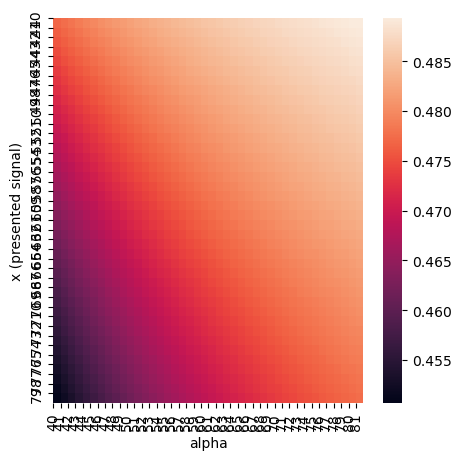

In [13]:
plt.figure(figsize=(5,5))
sns.heatmap(p_trial_right)
plt.xlabel('alpha')
plt.ylabel('x (presented signal)')
plt.xticks(np.arange(0,42), np.arange(prior_range[0],prior_range[1]+2))
plt.yticks(np.arange(0,40), np.arange(prior_range[0],prior_range[1]))

In [25]:
def normalize_vals(x):
    return (x-4)/196 # assuming 4 and 200 are the bounds

def inv_normalize_vals(x):
    return x*196+4 # assuming 4 and 200 are the bounds

In [15]:
avg = 50
std = 10
avg = normalize_vals(avg)
std_dev = normalize_vals(std)
priorx = np.linspace(normalize_vals(prior_range[0]),normalize_vals(prior_range[1]), prior_range[1]-prior_range[0])
# prior += 1/prior.shape[0]
# Define the prior
priorx, avg, std_dev

(array([0.18367347, 0.18890633, 0.19413919, 0.19937206, 0.20460492,
        0.20983778, 0.21507064, 0.22030351, 0.22553637, 0.23076923,
        0.23600209, 0.24123496, 0.24646782, 0.25170068, 0.25693354,
        0.26216641, 0.26739927, 0.27263213, 0.27786499, 0.28309785,
        0.28833072, 0.29356358, 0.29879644, 0.3040293 , 0.30926217,
        0.31449503, 0.31972789, 0.32496075, 0.33019362, 0.33542648,
        0.34065934, 0.3458922 , 0.35112507, 0.35635793, 0.36159079,
        0.36682365, 0.37205651, 0.37728938, 0.38252224, 0.3877551 ]),
 0.23469387755102042,
 0.030612244897959183)

In [17]:
from scipy.stats import skewnorm

In [19]:
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
mean, var, skew, kurt

(np.float64(0.7740617226446519),
 np.float64(0.40082844953639396),
 np.float64(0.7844267553823128),
 np.float64(0.6327847548211796))

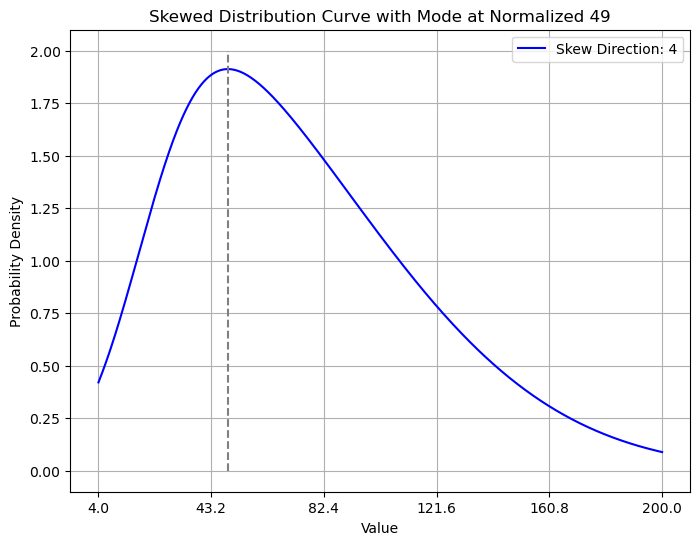

Corrected Mode (Normalized): 0.22959183673469388
Corrected Mode (Original Scale): 49.0


In [38]:
# Parameters
x_min, x_max = 4, 200
x_min = normalize_vals(x_min)
x_max = normalize_vals(x_max)
mode = normalize_vals(49)  # Explicitly set mode at normalized 49
variance = normalize_vals(30)
skew_direction = 4  # Positive for right skew, negative for left skew

# Calculate shape, loc, scale for skewnorm
scale = np.sqrt(variance)
loc = mode  # Set loc to the mode directly to ensure mode placement
shape = skew_direction  # Determines the skew direction and intensity

# Generate data
x = np.linspace(x_min, x_max, 1000)
y = skewnorm.pdf(x, shape, loc=loc, scale=scale)

# Ensure the actual mode aligns with the desired mode
actual_mode_index = np.argmax(y)
actual_mode = x[actual_mode_index]

# Adjust loc so the mode aligns exactly with the desired value
loc_correction = mode - actual_mode
loc += loc_correction
y = skewnorm.pdf(x, shape, loc=loc, scale=scale)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=f'Skew Direction: {skew_direction}', color='blue')
plt.title("Skewed Distribution Curve with Mode at Normalized 49")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.xticks(np.arange(0, 1.1, 0.2), [str(np.round(inv_normalize_vals(i), 2)) for i in np.arange(0, 1.1, 0.2)])
plt.legend()
plt.grid()
plt.vlines(mode,0,2,color='grey',ls='--')
plt.show()

# Display the corrected mode in normalized and un-normalized scale
print(f"Corrected Mode (Normalized): {mode}")
print(f"Corrected Mode (Original Scale): {inv_normalize_vals(mode)}")



In [71]:
def get_skewed_distribution(prior_range):
    # Parameters
    alpha_min, alpha_max = prior_range[0],prior_range[1] #4, 200
    alpha_min = normalize_vals(alpha_min)
    alpha_max = normalize_vals(alpha_max)
    mode = normalize_vals(49)  # Explicitly set mode at normalized 49
    variance = normalize_vals(30)
    skew_direction = 4  # Positive for right skew, negative for left skew

    # Calculate shape, loc, scale for skewnorm
    scale = np.sqrt(variance)
    loc = mode  # Set loc to the mode directly to ensure mode placement
    shape = skew_direction  # Determines the skew direction and intensity

    # Generate data
    x = np.linspace(alpha_min, alpha_max, prior_range[1]-prior_range[0])
    print('x',x)
    y = skewnorm.pdf(x, shape, loc=loc, scale=scale)

    # Ensure the actual mode aligns with the desired mode
    actual_mode_index = np.argmax(y)
    actual_mode = x[actual_mode_index]

    # Adjust loc so the mode aligns exactly with the desired value
    loc_correction = mode - actual_mode
    loc += loc_correction
    y = skewnorm.pdf(x, shape, loc=loc, scale=scale)
    
    return y

In [72]:
Ntrials = 100

In [73]:
import random

# Generate 75 random unique indices from 0 to 99
random_indices = random.sample(range(Ntrials), int(.75*Ntrials))

print(random_indices)

accuracy = np.zeros(Ntrials)
accuracy[random_indices] = 1
accuracy

[62, 85, 57, 32, 15, 79, 55, 74, 46, 34, 39, 92, 18, 63, 49, 96, 60, 84, 61, 8, 99, 0, 77, 56, 45, 47, 95, 86, 82, 50, 58, 83, 68, 14, 98, 33, 24, 30, 12, 10, 25, 22, 17, 97, 38, 53, 59, 11, 3, 90, 64, 75, 37, 21, 94, 72, 66, 78, 91, 2, 41, 5, 71, 69, 27, 93, 29, 51, 76, 40, 28, 20, 67, 35, 26]


array([1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

x [0.         0.00512821 0.01025641 0.01538462 0.02051282 0.02564103
 0.03076923 0.03589744 0.04102564 0.04615385 0.05128205 0.05641026
 0.06153846 0.06666667 0.07179487 0.07692308 0.08205128 0.08717949
 0.09230769 0.0974359  0.1025641  0.10769231 0.11282051 0.11794872
 0.12307692 0.12820513 0.13333333 0.13846154 0.14358974 0.14871795
 0.15384615 0.15897436 0.16410256 0.16923077 0.17435897 0.17948718
 0.18461538 0.18974359 0.19487179 0.2        0.20512821 0.21025641
 0.21538462 0.22051282 0.22564103 0.23076923 0.23589744 0.24102564
 0.24615385 0.25128205 0.25641026 0.26153846 0.26666667 0.27179487
 0.27692308 0.28205128 0.28717949 0.29230769 0.2974359  0.3025641
 0.30769231 0.31282051 0.31794872 0.32307692 0.32820513 0.33333333
 0.33846154 0.34358974 0.34871795 0.35384615 0.35897436 0.36410256
 0.36923077 0.37435897 0.37948718 0.38461538 0.38974359 0.39487179
 0.4        0.40512821 0.41025641 0.41538462 0.42051282 0.42564103
 0.43076923 0.43589744 0.44102564 0.44615385 0.45128205 0.456

/var/folders/n9/nm1w6x910sb0s0_nd41brq0r0000gp/T/ipykernel_32358/4255052331.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)


trial 6 0.36325160978455334
wrong? 0.0
trial 7 0.3945193483158874
wrong? 0.0
trial 8 0.4222003943946175
corr? 1.0
trial 9 0.4066929531917047
wrong? 0.0


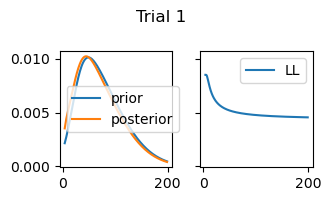

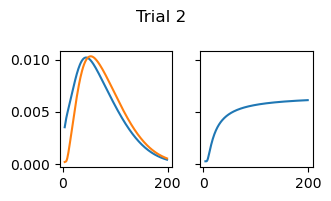

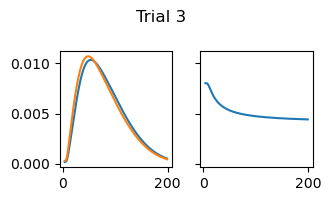

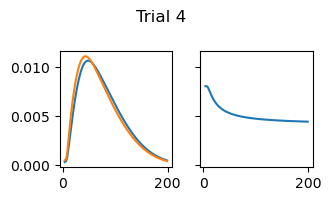

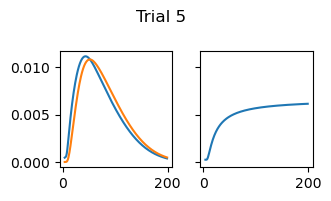

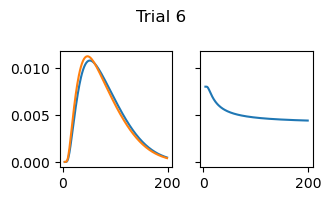

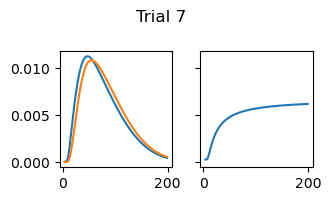

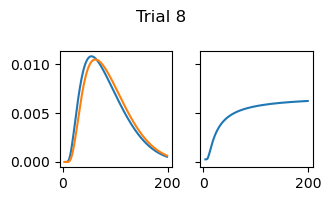

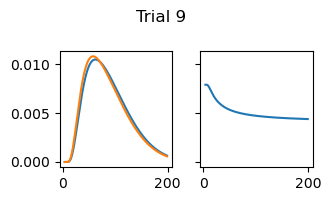

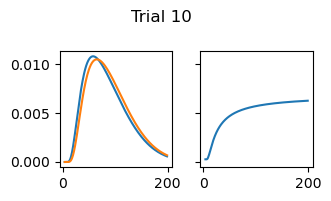

In [75]:
prior_range = [4,200]
prior_all = []
likelihood_all = []
for i in range(10):#(Ntrials):
    currTrial_acc = accuracy[i]

    p_trial_right = []
    p_trial_wrong = []

    if i == 0:
        # Gaussian prior
        # avg = 70
        # std = 40
        # avg = normalize_vals(avg)
        # std_dev = normalize_vals(std)
        # priorx = np.linspace(normalize_vals(prior_range[0]),normalize_vals(prior_range[1]), prior_range[1]-prior_range[0])
        # # prior += 1/prior.shape[0]
        # prior = np.exp(-0.5 * ((priorx - avg) / std_dev) ** 2)  # Gaussian formula
        prior = get_skewed_distribution(prior_range)
        prior = prior/(prior.sum())

        # flat prior
        # prior = np.zeros((np.arange(prior_range[0],prior_range[1]).shape[0],))
        # prior += 1/prior.shape[0]
        
        prior_all.append(prior) 
        
    else:
        prior = prior_all[-1]

    for alpha_unnorm in np.arange(prior_range[0],prior_range[1]):
        alpha = (alpha_unnorm-4)/(prior_range[1]-prior_range[0]) #49
        gamma = .5
        lmbda = .02
        # alpha = (49-4)/196 #49
        # beta = 1 #-0.00178
        # beta = -0.23 #-0.00178
        beta = 0.23
        if i == 0:
            x = 50  # ndots on a trial
        else:
            # x = np.nanmean(prior_all[-1])
            # Calculate weighted sum
            weighted_sum = sum(alpha * prior[i] for i, alpha in enumerate(np.arange(prior_range[0],prior_range[1])))

            # Calculate normalization factor
            normalization_factor = sum(prior)

            # Calculate mean
            mean_alpha = weighted_sum / normalization_factor
            x = mean_alpha

        x = (x-4)/196 #49

        if alpha_unnorm == prior_range[0]:
            print('trial',i, x)
        # print(x)
        
        # betaAdjusted = beta * 0.5
        preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
        # preal = gamma + (1-gamma-lmbda)*(1-np.exp(-10)**(beta*(x-alpha)))
        # preal = preal*10
        # smoothingFactor = 10
        # preal = preal**smoothingFactor
        # if np.isnan(preal):
        #     break

        p_trial_right.append(preal)#preal)
        p_trial_wrong.append((1-preal))#1-preal)
        # p_trial_right.append(preal**smoothingFactor)#preal)
        # p_trial_wrong.append((1-preal)**smoothingFactor)#1-preal)

    if int(currTrial_acc) == 1:
        print('corr?',currTrial_acc)
        likelihood = p_trial_right
    else:
        print('wrong?',currTrial_acc)
        likelihood = p_trial_wrong
    # likelihood = p_trial_right if currTrial_acc == 1 else p_trial_wrong
    likelihood = likelihood/sum(likelihood)
    # likelihood = -np.log(likelihood)
    # likelihood = [1000*i for i in likelihood]
    posterior = np.multiply(prior,likelihood)
    if np.isnan(posterior[0]):
            raise Exception('out')
    posterior = posterior/(posterior.sum())
    likelihood_all.append(likelihood)
    prior_all.append(posterior)

    # fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(5,2))#,sharey=True)
    # axs[0].plot(np.arange(prior_range[0],prior_range[1]),prior)
    # axs[1].plot(np.arange(prior_range[0],prior_range[1]),likelihood)
    # axs[2].plot(np.arange(prior_range[0],prior_range[1]),posterior)
    # plt.tight_layout()

    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(3.5,2),sharey=True)
    axs[0].plot(np.arange(prior_range[0],prior_range[1]),prior, label='prior')
    axs[0].plot(np.arange(prior_range[0],prior_range[1]),posterior, label='posterior')
    axs[1].plot(np.arange(prior_range[0],prior_range[1]),likelihood, label = 'LL')
    # axs[0].set_ylim(0.023,0.027)
    if i == 0:
        axs[0].legend()
        axs[1].legend()
    fig.suptitle(f'Trial {i+1}')
    plt.tight_layout()


prior_all = np.array(prior_all)
# prior_all.shape


In [ ]:
sns.heatmap(prior_all)y

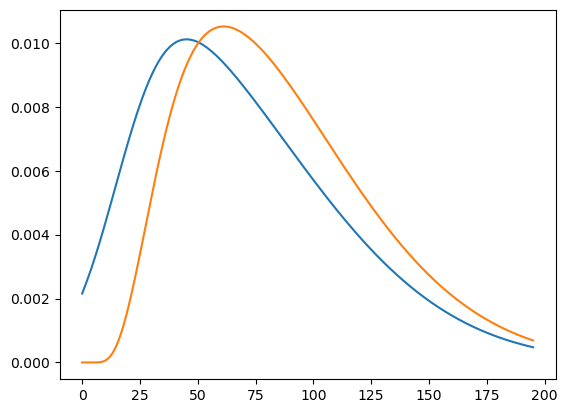

In [78]:
plt.plot(prior_all[0])
plt.plot(prior_all[-1])

<Axes: >

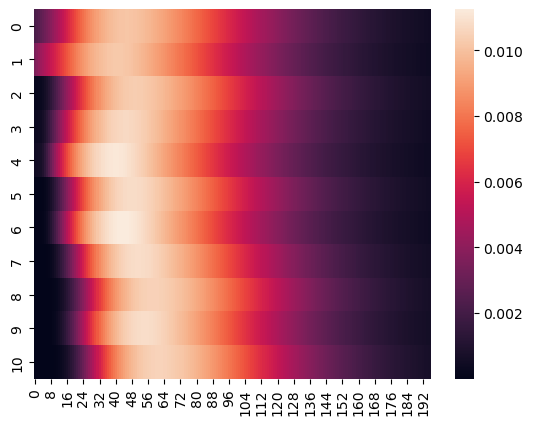

In [77]:
sns.heatmap(prior_all)

In [399]:
currTrial_acc

np.float64(1.0)

In [400]:
preal

np.float64(5.1362175555105685)

In [378]:
prior_all[3].mean(), prior_all[-2].mean()

(np.float64(0.025000000000000005), np.float64(0.025))

In [383]:
np.arange(prior_range[0],prior_range[1])[np.argmax(prior_all[3])]

np.int64(65)

In [384]:
np.arange(prior_range[0],prior_range[1])[np.argmax(prior_all[-2])]

np.int64(79)

np.int64(65)

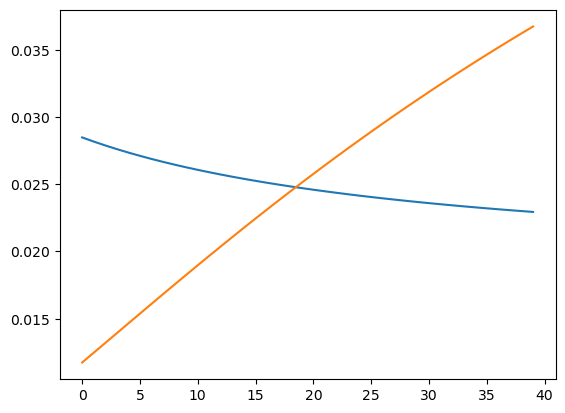

In [369]:
plt.plot(prior_all[3])
plt.plot(prior_all[-2])

In [7]:
# test weibull to ID the 75% threshold
gamma = .5
lmbda = .02
alpha = (49-4)/196 #49
beta = 0.23 #-0.00178
p_target = .75
x = 1-((20-4)/196)
preal = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta) # (x/alpha)**beta = -np.power(np.log(1-(p - gamma)/(1-gamma-lmbda)),1/beta) # p = gamma + (1-gamma-lmbda)*(1-np.exp(-x/alpha)**beta)
preal

np.float64(0.7887108602794333)

100